<a href="https://colab.research.google.com/github/loouisbrandon/ONS_FINAL/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infnet final project Data Modeling ONS News



Modelagem de tópicos é uma técnica para extrair os tópicos ocultos de grandes volumes de texto. Latent Dirichlet Allocation (LDA) é um algoritmo popular para modelagem de tópicos com excelentes implementações no pacote Gensim do Python. O desafio, no entanto, é como extrair tópicos de boa qualidade que sejam claros, segregados e significativos . Isso depende muito da qualidade do pré-processamento do texto e da estratégia de encontrar o número ideal de tópicos.

Uma das principais aplicações do processamento de linguagem natural é extrair automaticamente quais tópicos as pessoas estão discutindo de grandes volumes de texto. Alguns exemplos de texto grande podem ser feeds de mídia social, avaliações de clientes de hotéis, filmes, etc., feedbacks de usuários, notícias, e-mails de reclamações de clientes, etc.

Saber o que as pessoas estão falando e compreender seus problemas e opiniões é altamente valioso para empresas, administradores e campanhas políticas. E é realmente difícil ler manualmente em volumes tão grandes e compilar os tópicos.

Portanto, é necessário um algoritmo automatizado que possa ler os documentos de texto e gerar automaticamente os tópicos discutidos.


## Importando as ferramentas

In [111]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import unicodedata

# Importando a library Natural Language Toolkit - NLTK para tratamento de linguagem natural.
import nltk
nltk.download('wordnet')
nltk.download('punkt')

#Importando as stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
language = 'portuguese'

stopwords = stopwords.words(language)
stopwords = list(set(stopwords))

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
#Plotagem
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
#Adicionando novas stopwords em português
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('ja')
stopwords.append('viu')
stopwords.append('vai')
stopwords.append('ne')
stopwords.append('ai')
stopwords.append('ta')
stopwords.append('gente')
stopwords.append('nao')
stopwords.append('aqui')
stopwords.append('tambem')
stopwords.append('vc')
stopwords.append('voce')
stopwords.append('entao')
stopwords.append('ate')
stopwords.append('agora')
stopwords.append('ser')
stopwords.append('sempre')
stopwords.append('ter')
stopwords.append('so')
stopwords.append('porque')
stopwords.append('sobre')
stopwords.append('ainda')
stopwords.append('la')
stopwords.append('tudo')
stopwords.append('ninguem')
stopwords.append('de')

## Coletando dados

In [113]:
caminho = '/content/scraping1.csv'
dataframe = pd.read_csv(caminho, quotechar="'", header = None, names = ["Titulo", "Subtitulo"])
dataframe.head()


,Titulo,Subtitulo
NaN,Título,Subtítulo
0.0,Níveis dos reservatórios apresentam recuo em t...,"""Região Nordeste opera com 91"
1.0,"""Região SE/CO tem recuo de 0",1 p.p e opera com 65
2.0,"""Região Sul tem recuo de 0",1 p.p e está com 95
3.0,"""“A Interface do Direito de Energia – Tomo II”...","29"""


In [114]:
dataframe.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

,index,Titulo,Subtitulo
0,NaN,Título,Subtítulo
1,0.0,Níveis dos reservatórios apresentam recuo em t...,"""Região Nordeste opera com 91"
2,1.0,"""Região SE/CO tem recuo de 0",1 p.p e opera com 65
3,2.0,"""Região Sul tem recuo de 0",1 p.p e está com 95
4,3.0,"""“A Interface do Direito de Energia – Tomo II”...","29"""
...,...,...,...
131,130.0,Reservatórios do Norte apontam recuo após perí...,"""SE/CO opera com 58"
132,131.0,"""Região Sul tem queda de 0",4 p. p e está com 28
133,132.0,"""Volume dos reservatórios do Norte chegam a 96","7% da capacidade"""
134,133.0,"""Fevereiro deve registrar aumento na carga de 0","2%"""


In [115]:
len(dataframe)

136

## Pré processamento




In [167]:
for item in list(set(dataframe["Titulo"])):
    print(item, type(item))

"Nordeste opera com 82 <class 'str'>
"Região SE/CO bate novo recorde de carga <class 'str'>
Região Sul conta com 89% do volume útil <class 'str'>
"Carga desacelera e previsão é de alta de 0 <class 'str'>
Título <class 'str'>
"Região Sul tem queda de 0 <class 'str'>
Reservatórios apresentaram aumento no volume útil <class 'str'>
Projeto “Território Inventivo” será lançado na sede do ONS <class 'str'>
Aneel recebe contribuições para Tomada de Subsídios para revisão de Procedimentos de Rede <class 'str'>
"ONS projeta carga 1 <class 'str'>
"Maior dificuldade na crise hídrica foi diagnóstico <class 'str'>
Lactec prepara estudos hidrológicos em bacias do Sul e Sudeste para ONS <class 'str'>
"Nordeste conta com 84 <class 'str'>
"Reservatórios do Sul seguem em queda e chegam a 30 <class 'str'>
"Reservatórios do Norte contam com volume de 94 <class 'str'>
"“A Interface do Direito de Energia – Tomo II” tem lançamento na próxima quarta-feira <class 'str'>
"Nordeste conta com 95 <class 'str'>
"Reg

In [153]:


#Aplicando função para remover os caracteres Non ASCII
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words



In [154]:
data = [line.strip() for line in open("/content/scraping1.csv", 'r')]
texts = [[word.lower() for word in text.split()] for text in data]

In [155]:
data = remove_non_ascii(data)
data

[',Titulo,Subtitulo',
 '0,Niveis dos reservatorios apresentam recuo em todos subsistemas,"Regiao Nordeste opera com 91,4%, Norte com 96,9%, SE/CO com 65,6% e Sul com 95,3% nos niveis de armazenamento"',
 '1,"Regiao SE/CO tem recuo de 0,1 p.p e opera com 65,7% da capacidade","Submercado do Sul e Norte tiveram recuo de 0,3 p.p e Nordeste apresentou niveis estaveis"',
 '2,"Regiao Sul tem recuo de 0,1 p.p e esta com 95,8% do volume util","Com excecao da regiao Norte que ficou com niveis estaveis, todos os outros submercado tiveram recuo"',
 '3,"A Interface do Direito de Energia  Tomo II tem lancamento na proxima quarta-feira, 29","O livro busca apresentar uma visao sistematica da questao juridica, tecnica, economica, regulatoria e financeira do setor eletrico"',
 '4,"ONS: Carga recua para 0,7% em maio","Temperaturas mais elevadas explica resultado, que apresenta alta no acumulado anual para todos submercados"',
 '5,"Submercado do Norte conta com 97,9% de sua capacidade","Nordeste esta com 

In [156]:
#Removendo pontuação e fazendo a tokeinização (para conseguir aplicar o modelo LDA)
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:2])

[['titulo', 'subtitulo'], ['niveis', 'dos', 'reservatorios', 'apresentam', 'recuo', 'em', 'todos', 'subsistemas', 'regiao', 'nordeste', 'opera', 'com', 'norte', 'com', 'se', 'co', 'com', 'sul', 'com', 'nos', 'niveis', 'de', 'armazenamento']]


In [157]:
# Construindo os modelos bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # limite superior menos as frases
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama / bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


['titulo', 'subtitulo']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [158]:
# Definindo funções para stopwords, bigrams and trigrams
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [159]:
# Removendo Stop Words
data_words_nostops = remove_stopwords(data_words)

# Formando Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

data_words_bigrams

[['titulo', 'subtitulo'],
 ['niveis',
  'reservatorios',
  'apresentam',
  'recuo',
  'todos',
  'subsistemas',
  'regiao',
  'nordeste',
  'opera',
  'norte',
  'co',
  'sul',
  'niveis',
  'armazenamento'],
 ['regiao',
  'co',
  'recuo',
  'opera',
  'capacidade',
  'submercado',
  'sul',
  'norte',
  'recuo',
  'nordeste',
  'apresentou',
  'niveis',
  'estaveis'],
 ['regiao',
  'sul',
  'recuo',
  'volume',
  'util',
  'excecao',
  'regiao',
  'norte',
  'ficou',
  'niveis',
  'estaveis',
  'todos',
  'outros',
  'submercado',
  'recuo'],
 ['interface',
  'direito',
  'energia',
  'tomo',
  'ii',
  'lancamento',
  'proxima',
  'quarta',
  'feira',
  'livro',
  'busca',
  'apresentar',
  'visao',
  'sistematica',
  'questao',
  'juridica',
  'tecnica',
  'economica',
  'regulatoria',
  'financeira',
  'setor',
  'eletrico'],
 ['ons',
  'carga',
  'recua',
  'maio',
  'temperaturas',
  'elevadas',
  'explica',
  'resultado',
  'apresenta',
  'alta',
  'acumulado',
  'anual',
  'todos

## Criando dicionário e corpus para a modelagem


In [160]:
# Criando dicionário
id2word = corpora.Dictionary(data_words_bigrams)

# Criando corpus
texts = data_words_bigrams

# Frequencia do documento do termo
corpus = [id2word.doc2bow(text) for text in texts]

# visualizando
print(corpus[:1])


[[(0, 1), (1, 1)]]



## Construindo a Modelagem

Temos tudo para treinar o modelo LDA. Além do corpus e do dicionário, você também precisa fornecer o número de tópicos.


In [161]:
# Construindo LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [162]:
# Imprindo as palavras chaves nos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.116*"queda" + 0.058*"subsistemas" + 0.052*"outros" + '
  '0.052*"reservatorios" + 0.050*"todos" + 0.045*"continuam" + '
  '0.041*"crescimento" + 0.031*"continua" + 0.028*"seguem" + 0.021*"apos"'),
 (1,
  '0.049*"vazoes" + 0.038*"ons" + 0.033*"crescer" + 0.030*"regioes" + '
  '0.028*"carga" + 0.027*"revisao" + 0.023*"pmo" + 0.020*"reuniao" + '
  '0.017*"usinas" + 0.017*"subsistema"'),
 (2,
  '0.043*"liberacao" + 0.029*"ons" + 0.028*"media" + 0.024*"taesa" + '
  '0.024*"nova" + 0.020*"serao" + 0.020*"autoriza" + 0.020*"rap" + '
  '0.020*"receita" + 0.020*"adicionados"'),
 (3,
  '0.038*"geracao" + 0.034*"dias" + 0.021*"ordem" + 0.021*"merito" + '
  '0.021*"cmse" + 0.020*"ons" + 0.019*"reservatorio" + 0.019*"usina" + '
  '0.019*"patamar" + 0.019*"dia"'),
 (4,
  '0.027*"ons" + 0.022*"pais" + 0.020*"afirma" + 0.020*"deixa" + 0.020*"abril" '
  '+ 0.018*"fevereiro" + 0.018*"versao" + 0.016*"deve" + 0.016*"sobe" + '
  '0.014*"maior"'),
 (5,
  '0.049*"ons" + 0.035*"fim" + 0.030*"sin" +


## Calculando a pontuação de perplexidade e coerência do modelo


In [163]:
# Calculando a perplexidade
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Calculando o score de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.658125031196797

Coherence Score:  0.36567896677597256


In [164]:
# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus, texts, limit, start=3, step=3):
    """
    Compute c_v coherence para vários números de tópicos

    Parâmetros passados:
    ----------
    dicionário : Gensim dicionário
    corpus : Gensim corpus
    texto : Lista com os textos de entrada
    limite : número máximo de tópicos

    Retorno:
    -------
    model_list : Lista de modelos de tópicos de LDA
    coherence_values : Valor de coerência correspondente ao modelo LDA com o respectivo número de tópicos.
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [165]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=3, limit=40, step=6)


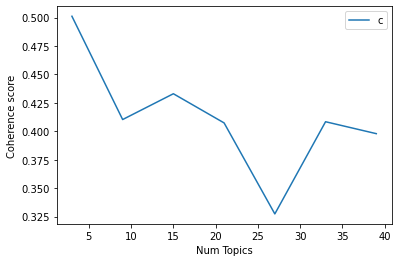

In [166]:
# Show graph
limit=40; start=3; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [168]:
# Lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico
for m, cv in zip(x, coherence_values):
    print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))



A quantidade de tópicos = 3  tem um valor de coerência de  0.5011
A quantidade de tópicos = 9  tem um valor de coerência de  0.4103
A quantidade de tópicos = 15  tem um valor de coerência de  0.433
A quantidade de tópicos = 21  tem um valor de coerência de  0.4073
A quantidade de tópicos = 27  tem um valor de coerência de  0.3274
A quantidade de tópicos = 33  tem um valor de coerência de  0.4084
A quantidade de tópicos = 39  tem um valor de coerência de  0.3979


In [169]:
# Selecionando o modelo  e imprimindo os tópicos.
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))


[(0,
  '0.023*"ons" + 0.020*"norte" + 0.017*"sul" + 0.016*"nordeste" + 0.016*"co" + '
  '0.014*"niveis" + 0.011*"estaveis" + 0.011*"regiao" + 0.010*"recuo" + '
  '0.010*"setor"'),
 (1,
  '0.048*"sul" + 0.045*"co" + 0.045*"nordeste" + 0.041*"norte" + '
  '0.039*"capacidade" + 0.035*"regiao" + 0.029*"niveis" + '
  '0.026*"reservatorios" + 0.020*"aumento" + 0.016*"volume"'),
 (2,
  '0.033*"norte" + 0.033*"sul" + 0.031*"co" + 0.028*"regiao" + '
  '0.023*"nordeste" + 0.022*"opera" + 0.019*"niveis" + 0.018*"ons" + '
  '0.016*"reservatorios" + 0.016*"volume"')]


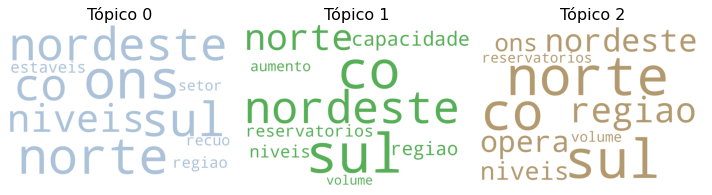

In [170]:
# Criando wordclouds
cols = [color for name, color in mcolors.XKCD_COLORS.items()]
cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = optimal_model.show_topics(formatted=False)
fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=600)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Tópico ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Encontrando o tópico dominante em cada frase


In [172]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Saída inicial
    sent_topics_df = pd.DataFrame()

    # Obtém o tópico principal em cada documento
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Obtém o tópico dominante, contribuição em percentual e palavras-chave para cada documento
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => tópico dominante
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Tópico dominante', 'Percentual de Contribuição', 'Palavras Chave']

    # Adiciona o texto original no final da saída
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Formatando
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Número do documento', 'Tópico dominante', 'Perc. de Contribuição do Tópico', 'Palavras Chave', 'Transcription']

# Mostre
df_dominant_topic.head(10)

,Número do documento,Tópico dominante,Perc. de Contribuição do Tópico,Palavras Chave,Transcription
0,0,1.0,0.7739,"sul, co, nordeste, norte, capacidade, regiao, ...",",Titulo,Subtitulo"
1,1,1.0,0.9493,"sul, co, nordeste, norte, capacidade, regiao, ...","0,Niveis dos reservatorios apresentam recuo em..."
2,2,1.0,0.9466,"sul, co, nordeste, norte, capacidade, regiao, ...","1,""Regiao SE/CO tem recuo de 0,1 p.p e opera c..."
3,3,1.0,0.9511,"sul, co, nordeste, norte, capacidade, regiao, ...","2,""Regiao Sul tem recuo de 0,1 p.p e esta com ..."
4,4,2.0,0.9668,"norte, sul, co, regiao, nordeste, opera, nivei...","3,""A Interface do Direito de Energia Tomo II ..."
5,5,0.0,0.9191,"ons, norte, sul, nordeste, co, niveis, estavei...","4,""ONS: Carga recua para 0,7% em maio"",""Temper..."
6,6,1.0,0.9088,"sul, co, nordeste, norte, capacidade, regiao, ...","5,""Submercado do Norte conta com 97,9% de sua ..."
7,7,0.0,0.9636,"ons, norte, sul, nordeste, co, niveis, estavei...","6,Projeto Territorio Inventivo sera lancado na..."
8,8,1.0,0.9676,"sul, co, nordeste, norte, capacidade, regiao, ...","7,""Sudeste devera ter vazoes na faixa de 70% d..."
9,9,1.0,0.9443,"sul, co, nordeste, norte, capacidade, regiao, ...","8,""Reservatorios do Sul contam com 95,9% da ca..."
